In [1]:
import numpy as np
import pandas as pd
from scipy.stats import t
import scipy.stats as stats
from scipy.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# 데이터 생성
np.random.seed(0)  # 재현성을 위한 시드 설정
data1 = np.random.normal(loc=50, scale=5, size=1000)  # 정규분포 데이터
data2 = np.concatenate([np.random.normal(40, 3, 500), np.random.normal(60, 3, 500)])  # 이중봉우리 분포 데이터


### 예시) 동일한 평균 + 분포가 다른 두 집단 시각화

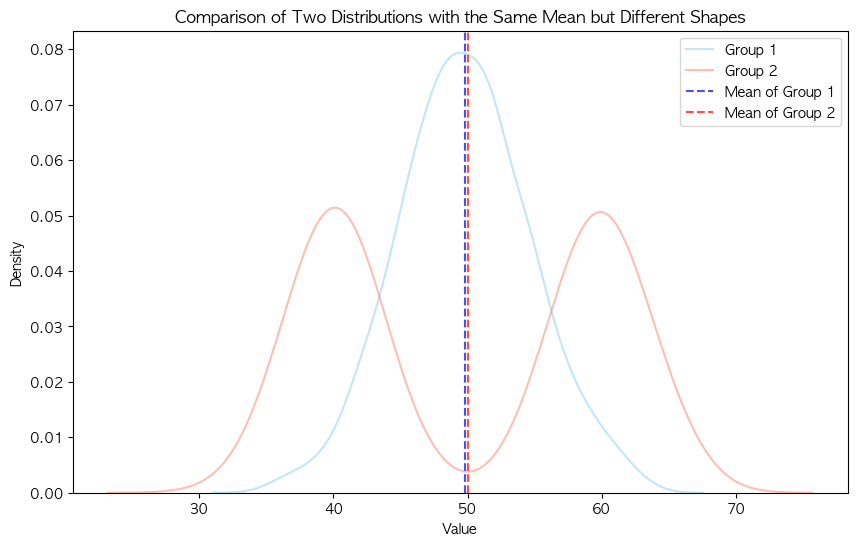

In [4]:
# 평균 계산
mean1 = np.mean(data1)
mean2 = np.mean(data2)
# 시각화
plt.figure(figsize=(10, 6))

# 두 그룹의 KDE 밀도 분포를 계산
density1 = sns.kdeplot(data1, color="skyblue", alpha=0.5, label="Group 1").get_lines()[-1].get_data()
density2 = sns.kdeplot(data2, color="salmon", alpha=0.5, label="Group 2").get_lines()[-1].get_data()

# 평균선 추가
plt.axvline(mean1, color="blue", linestyle="--", linewidth=1.5, alpha=0.7, label="Mean of Group 1")
plt.axvline(mean2, color="red", linestyle="--", linewidth=1.5, alpha=0.7, label="Mean of Group 2")

# 그래프 꾸미기
plt.title("Comparison of Two Distributions with the Same Mean but Different Shapes")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

### 정규성 가정 검정

#### 히스토그램을 활용한 정규성 검정

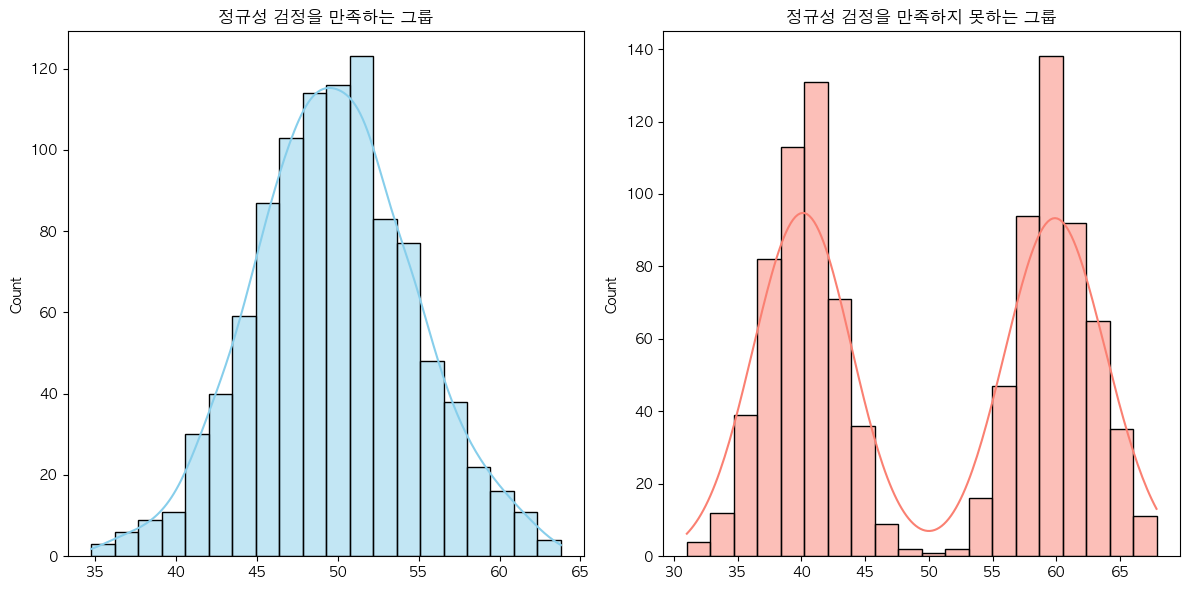

In [5]:
# 두 개의 히스토그램을 나란히 그리기 위한 설정
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1행 2열 배치

# 첫 번째 히스토그램
sns.histplot(data1, kde=True, ax=axes[0], bins = 20, color='skyblue')  # kde=True로 커널 밀도 추정선 추가
axes[0].set_title('정규성 검정을 만족하는 그룹')  # 첫 번째 그래프 제목

# 두 번째 히스토그램
sns.histplot(data2, kde=True, ax=axes[1], bins = 20, color='salmon')  # kde=True로 커널 밀도 추정선 추가
axes[1].set_title('정규성 검정을 만족하지 못하는 그룹')  # 두 번째 그래프 제목

# 그래프 레이아웃 자동 조정
plt.tight_layout()
plt.show()

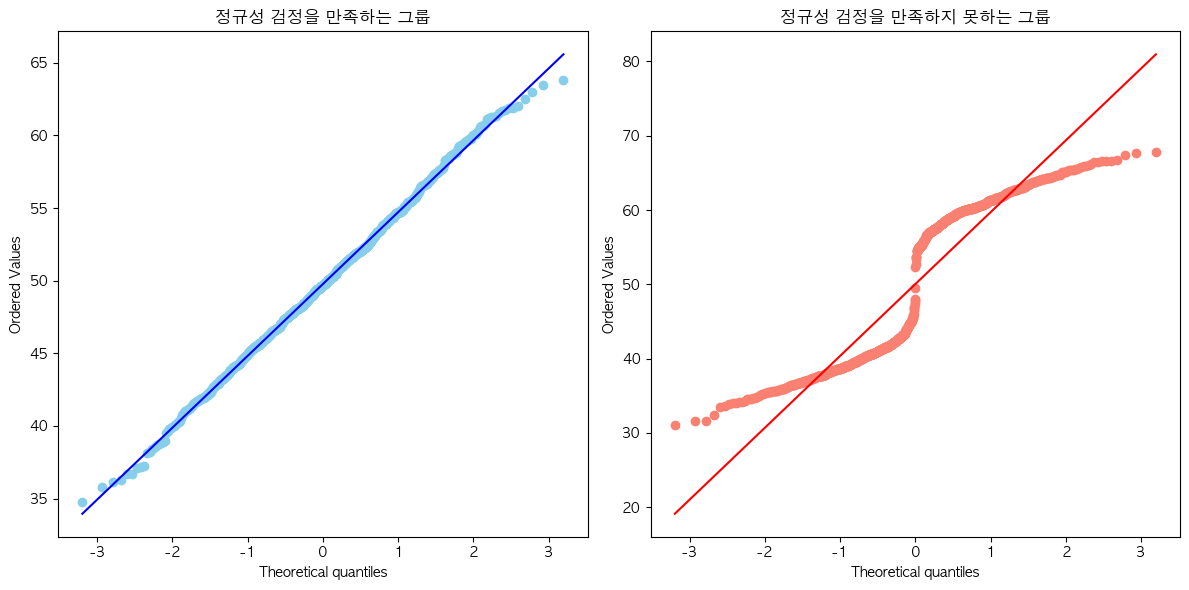

In [6]:
# 두 개의 QQ plot을 나란히 그리기 위한 설정
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1행 2열 배치

# 첫 번째 QQ plot
stats.probplot(data1, dist="norm", plot=axes[0])  # 첫 번째 데이터와 정규 분포 비교
axes[0].get_lines()[0].set_color('skyblue')  # 데이터 분포
axes[0].get_lines()[1].set_color('blue')  # 선 색상
axes[0].set_title('정규성 검정을 만족하는 그룹')  # 첫 번째 그래프 제목

# 두 번째 QQ plot
stats.probplot(data2, dist="norm", plot=axes[1])  # 두 번째 데이터와 정규 분포 비교
axes[1].get_lines()[0].set_color('salmon')  # 데이터 분포
axes[1].get_lines()[1].set_color('red')  # 선 색상
axes[1].set_title('정규성 검정을 만족하지 못하는 그룹')  # 두 번째 그래프 제목

# 그래프 레이아웃 자동 조정
plt.tight_layout()
plt.show()

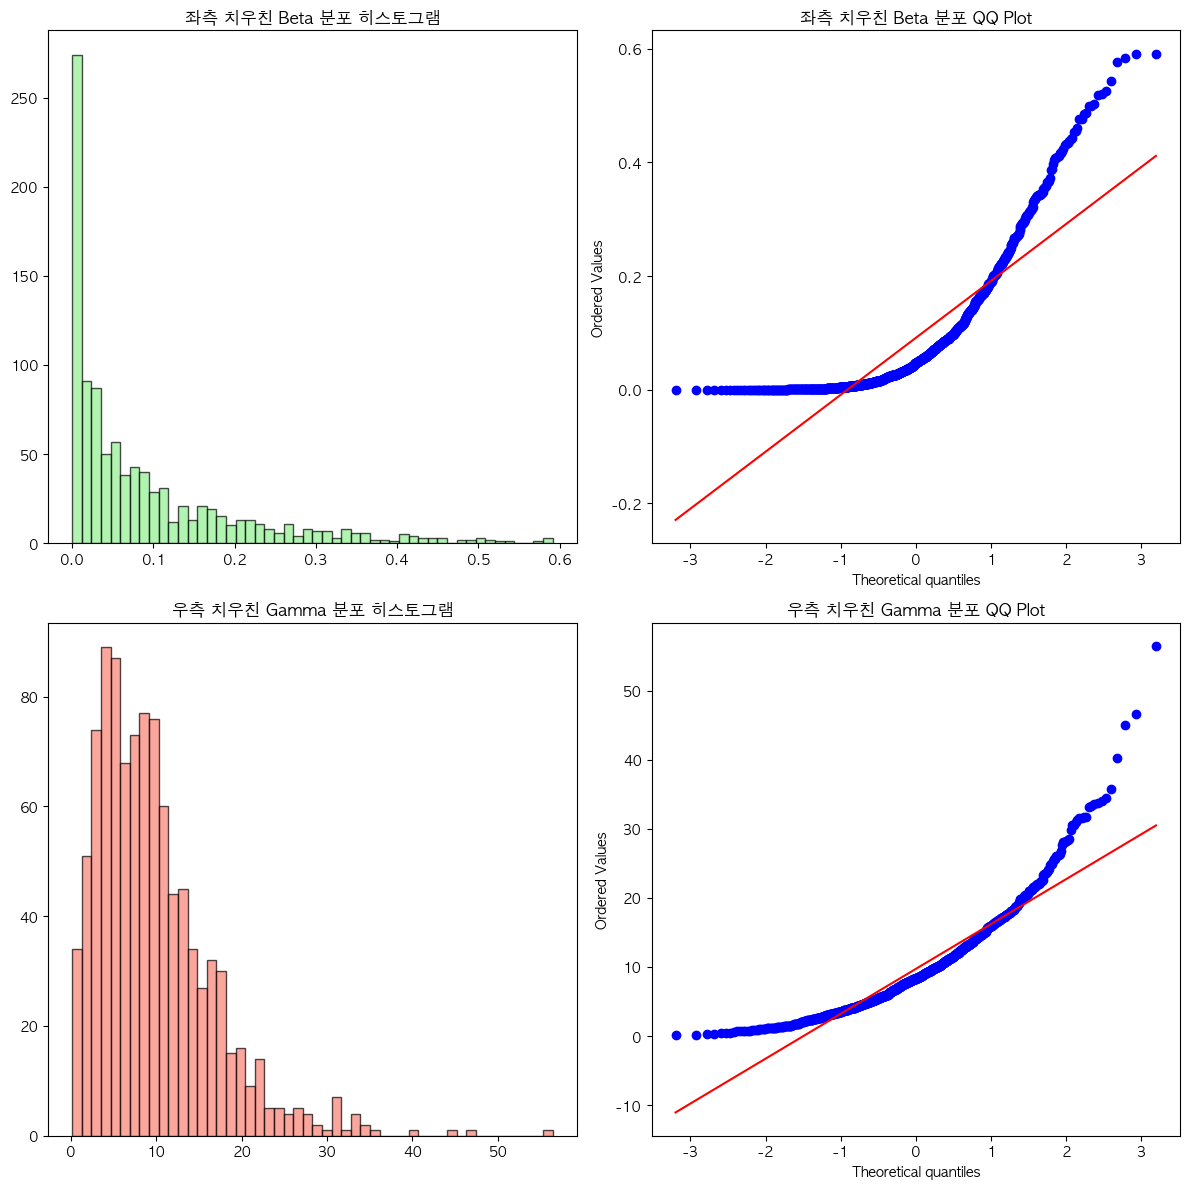

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정 (Mac에서는 "AppleGothic" 폰트가 일반적으로 사용됩니다)
matplotlib.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지지 않도록 설정

# 데이터 생성 (좌측/우측 치우친 분포)
np.random.seed(10)

# 1. 좌측 치우친 Beta 분포 (a=0.5, b=5)
left_skewed_data = np.random.beta(a=0.5, b=5, size=1000)

# 2. 우측 치우친 Gamma 분포 (shape=2, scale=5)
right_skewed_data = np.random.gamma(shape=2, scale=5, size=1000)

# 1행 3열로 히스토그램과 QQ plot을 나란히 배치할 설정
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2행 2열 배치

# 1. 좌측 치우친 분포 히스토그램과 QQ plot
axes[0, 0].hist(left_skewed_data, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('좌측 치우친 Beta 분포 히스토그램')
stats.probplot(left_skewed_data, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('좌측 치우친 Beta 분포 QQ Plot')

# 2. 우측 치우친 분포 히스토그램과 QQ plot
axes[1, 0].hist(right_skewed_data, bins=50, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('우측 치우친 Gamma 분포 히스토그램')
stats.probplot(right_skewed_data, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('우측 치우친 Gamma 분포 QQ Plot')

# 그래프 레이아웃 자동 조정
plt.tight_layout()
plt.show()

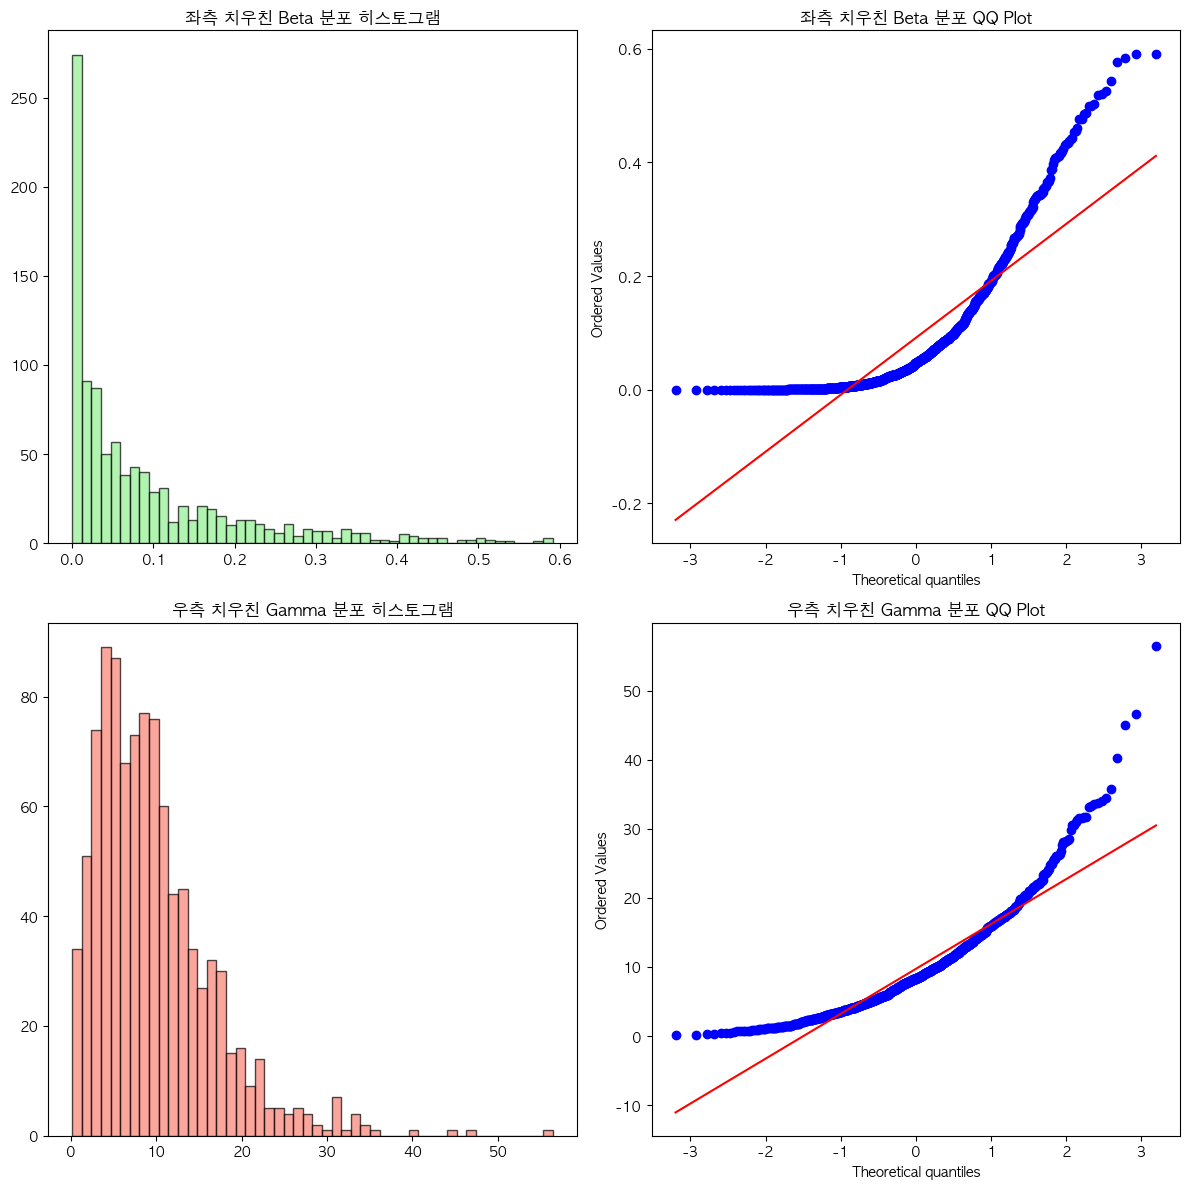

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정 (Mac에서는 "AppleGothic" 폰트가 일반적으로 사용됩니다)
matplotlib.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지지 않도록 설정

# 데이터 생성 (좌측/우측 치우친 분포)
np.random.seed(10)

# 1. 좌측 치우친 Beta 분포 (a=0.5, b=5)
left_skewed_data = np.random.beta(a=0.5, b=5, size=1000)

# 2. 우측 치우친 Gamma 분포 (shape=2, scale=5)
right_skewed_data = np.random.gamma(shape=2, scale=5, size=1000)

# 1행 3열로 히스토그램과 QQ plot을 나란히 배치할 설정
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2행 2열 배치

# 1. 좌측 치우친 분포 히스토그램과 QQ plot
axes[0, 0].hist(left_skewed_data, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('좌측 치우친 Beta 분포 히스토그램')
stats.probplot(left_skewed_data, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('좌측 치우친 Beta 분포 QQ Plot')

# 2. 우측 치우친 분포 히스토그램과 QQ plot
axes[1, 0].hist(right_skewed_data, bins=50, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('우측 치우친 Gamma 분포 히스토그램')
stats.probplot(right_skewed_data, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('우측 치우친 Gamma 분포 QQ Plot')

# 그래프 레이아웃 자동 조정
plt.tight_layout()
plt.show()

통계적 방식을 활용한 정규성 검정

In [9]:
# 샘플 데이터 생성
np.random.seed(39)
norm_50 = np.random.normal(loc=0, scale=1, size=50)  # 정규 분포를 따르는 50개의 데이터 생성
exp_50 = np.random.exponential(scale=2, size=50) # 지수 분포를 따르는 50개의 데이터 생성


norm_5000 = np.random.normal(loc=0, scale=1, size=5000) # 정규 분포를 따르는 5,000개의 데이터 생성
exp_5000 = np.random.exponential(scale=2, size=5000) # 지수 분포를 따르는 5,000개의 데이터 생성

In [10]:
# 50개 샘플에 대한 정규성 검정
# 1. Shapiro-Wilk Test 

# 1-1 정규 분포를 따르는 50개의 샘플
shapiro_stat, shapiro_p_value = stats.shapiro(norm_50)
print("정규 분포 샘플에 대한 Shapiro-Wilk Test 결과:")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p_value:.4f}")

# 1-2 지수 분포를 따르는 50개의 샘플
shapiro_stat, shapiro_p_value = stats.shapiro(exp_50)
print("지수 분포 샘플에 대한 Shapiro-Wilk Test 결과:")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p_value:.4f}")


정규 분포 샘플에 대한 Shapiro-Wilk Test 결과:
Statistic: 0.9776, p-value: 0.4548
지수 분포 샘플에 대한 Shapiro-Wilk Test 결과:
Statistic: 0.8704, p-value: 0.0001


In [11]:
# 2. Kolmogorov-Smirnov Test 

# 2-1 정규 분포를 따르는 5000개의 샘플
ks_stat, ks_p_value = stats.kstest(norm_5000, 'norm') 
# Kolmogorov-Smirnov Test는 정규분포 외 다른 분포와 비교도 가능합니다. 
# 따라서 명시적으로 비교할 분포를 지정해줄 필요가 있습니다.
print("정규 분포 샘플에 대한 Kolmogorov-Smirnov Test 결과:")
print(f"Statistic: {ks_stat:.4f}, p-value: {ks_p_value:.4f}")


# 2-2 정규 분포를 따르는 5000개의 샘플
ks_stat, ks_p_value = stats.kstest(exp_5000, 'norm')
print("지수 분포 샘플에 대한 Kolmogorov-Smirnov Test 결과:")
print(f"Statistic: {ks_stat:.4f}, p-value: {ks_p_value:.4f}")

정규 분포 샘플에 대한 Kolmogorov-Smirnov Test 결과:
Statistic: 0.0080, p-value: 0.8998
지수 분포 샘플에 대한 Kolmogorov-Smirnov Test 결과:
Statistic: 0.5003, p-value: 0.0000


### 독립성 가정 검정

#### 피어슨 상관계수를 활용한 상관분석

In [12]:
# 독립적인 두 개의 연속형 변수 생성
np.random.seed(42)

# 첫 번째 연속형 변수 생성
group1 = np.random.normal(loc=50, scale=10, size=200)
group2 = np.random.normal(loc=60, scale=15, size=200)

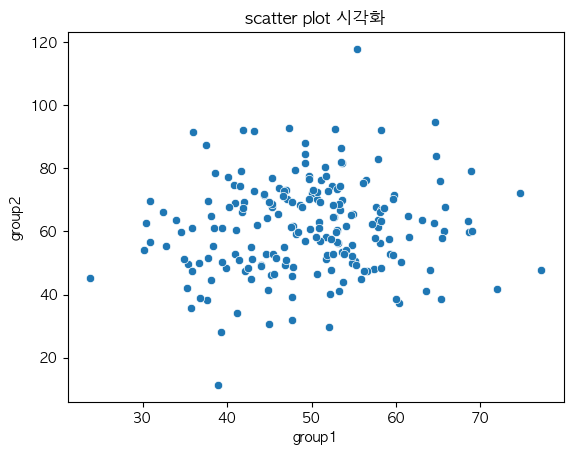

In [13]:
# 상관 관계 플롯
sns.scatterplot(x=group1, y=group2)
plt.title(f"scatter plot 시각화")
plt.xlabel('group1')
plt.ylabel('group2')
plt.show()

In [14]:
# 피어슨 상관계수 계산
corr_stat, p_value = pearsonr(group1, group2)

# 결과 출력
print(f"피어슨 상관 계수: {corr_stat}")
print(f"p-value: {p_value}")

피어슨 상관 계수: 0.09514667957172743
p-value: 0.180185026999929


### 등분산 검정

#### boxplot

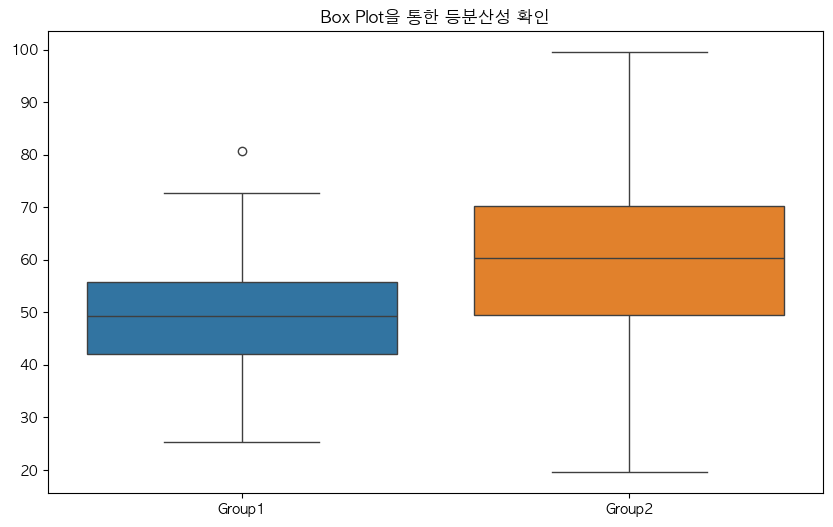

In [15]:
# 첫 번째 연속형 변수 생성
group1 = np.random.normal(loc=50, scale=10, size=200)
group2 = np.random.normal(loc=60, scale=15, size=200)

# 두 집단을 데이터프레임에 저장
data = pd.DataFrame({'Group1': group1, 'Group2': group2})

# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Box Plot을 통한 등분산성 확인")
plt.show()

#### Bartlett's Test (정규분포 가정 하의 등분산 검정)

In [16]:
# Bartlett's Test (정규분포 가정 하의 등분산 검정)
stat, p_value = stats.bartlett(group1, group2)

# 결과 출력
print(f"Bartlett's Test Statistic: {stat}")
print(f"p-value: {p_value}")

Bartlett's Test Statistic: 35.757693777074344
p-value: 2.2344779209849096e-09


####  Levene's Test (등분산 검정)

In [17]:
# Levene's Test (등분산 검정)
stat, p_value = stats.levene(group1, group2)

# 결과 출력
print(f"Levene's Test Statistic: {stat}")
print(f"p-value: {p_value}")


Levene's Test Statistic: 28.702990235860096
p-value: 1.4308976505839592e-07


### 정규분포와 비교

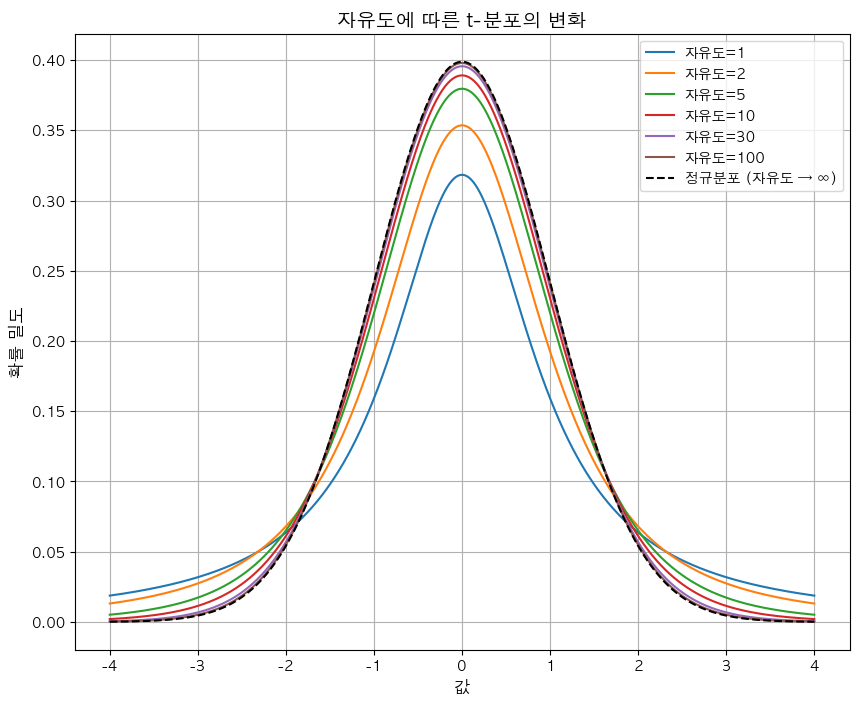

In [18]:
# x 값 범위 설정
x = np.linspace(-4, 4, 1000)

# 자유도 리스트
df_list = [1, 2, 5, 10, 30, 100]  # 여러 가지 자유도를 설정

# 그래프 설정
plt.figure(figsize=(10, 8))

# 반복문을 사용하여 각 자유도에 대해 t-분포 그리기
for df in df_list:
    y_t = t.pdf(x, df)  # t-분포 확률 밀도 함수
    plt.plot(x, y_t, label=f'자유도={df}')

# 정규분포도 함께 그려서 비교
y_norm = t.pdf(x, df=1000)  # 자유도가 매우 큰 값에 해당하는 정규분포
plt.plot(x, y_norm, label='정규분포 (자유도 → ∞)', color='black', linestyle='--')

# 제목 및 레이블
plt.title('자유도에 따른 t-분포의 변화', fontsize=14)
plt.xlabel('값', fontsize=12)
plt.ylabel('확률 밀도', fontsize=12)
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()

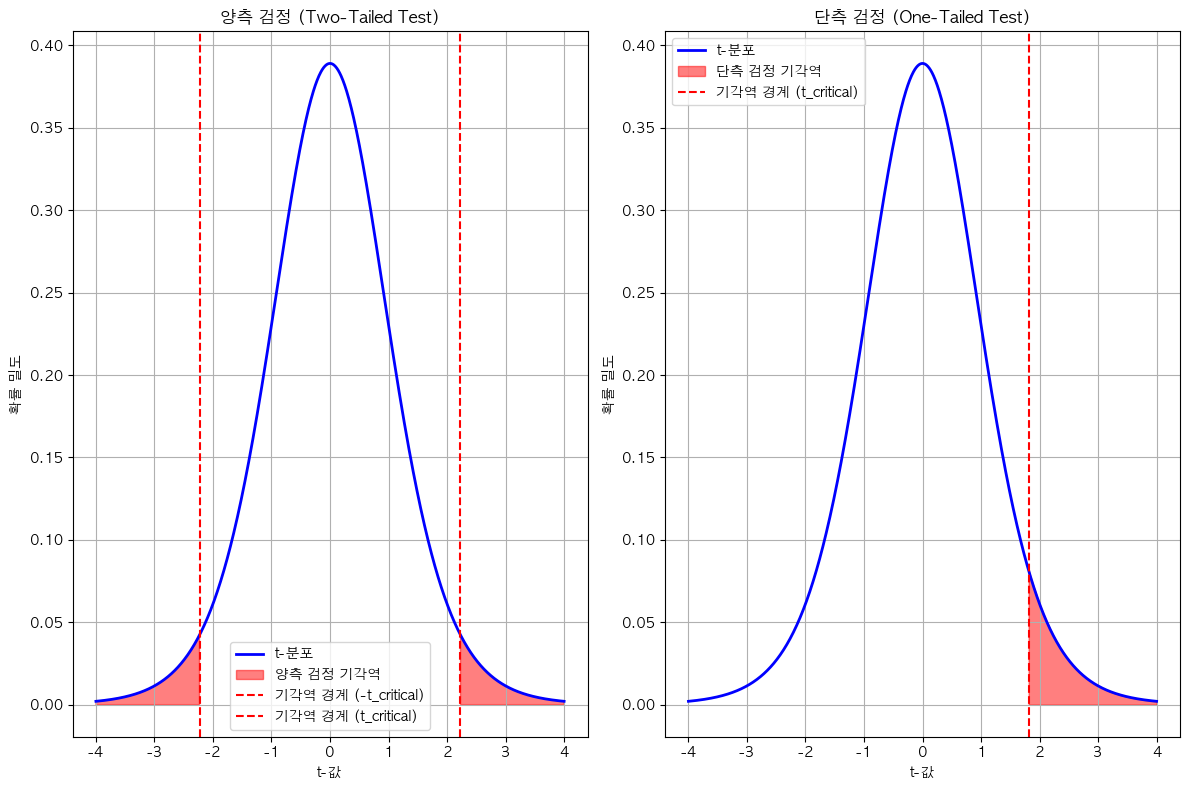

In [19]:
# t-분포의 파라미터 설정
df = 10  # 자유도
alpha = 0.05  # 유의수준

# t-분포의 값들 생성
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

# 기각역의 경계 값 계산
t_critical_two_tailed = t.ppf(1 - alpha / 2, df)  # 양측 검정의 기각역
t_critical_one_tailed = t.ppf(1 - alpha, df)  # 단측 검정의 기각역

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 양측 검정 그래프
plt.subplot(1, 2, 1)
plt.plot(x, y, label="t-분포", color="blue", linewidth=2)
plt.fill_between(x, 0, y, where=(x <= -t_critical_two_tailed) | (x >= t_critical_two_tailed), color="red", alpha=0.5, label="양측 검정 기각역")
plt.axvline(x=-t_critical_two_tailed, color="red", linestyle="--", label="기각역 경계 (-t_critical)")
plt.axvline(x=t_critical_two_tailed, color="red", linestyle="--", label="기각역 경계 (t_critical)")
plt.title('양측 검정 (Two-Tailed Test)')
plt.xlabel('t-값')
plt.ylabel('확률 밀도')
plt.legend()
plt.grid(True)

# 단측 검정 그래프
plt.subplot(1, 2, 2)
plt.plot(x, y, label="t-분포", color="blue", linewidth=2)
plt.fill_between(x, 0, y, where=(x >= t_critical_one_tailed), color="red", alpha=0.5, label="단측 검정 기각역")
plt.axvline(x=t_critical_one_tailed, color="red", linestyle="--", label="기각역 경계 (t_critical)")
plt.title('단측 검정 (One-Tailed Test)')
plt.xlabel('t-값')
plt.ylabel('확률 밀도')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.tight_layout()
plt.show()

### 단일표본 t-test

In [20]:
# 단일표본 t-test 준비
from scipy.stats import ttest_1samp
np.random.seed(39)  # 재현성을 위한 시드 설정
group1 = np.random.normal(loc=30000, scale=6000, size=200) #평균 30000, 표준편차 : 6000, n sample : 200
alpha = 0.05  # 유의수준 설정

# 양측 검정
t_stat, p_value = ttest_1samp(group1, 31000, alternative='two-sided')
print("양측 검정 결과:")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

# 오른쪽 단측 검정 (기준값보다 큰지)
t_stat, p_value = ttest_1samp(group1, 31000, alternative='greater')
print("\n오른쪽 단측 검정 결과:")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

# 왼쪽 단측 검정 (기준값보다 작은지)
t_stat, p_value = ttest_1samp(group1, 31000, alternative='less')
print("\n왼쪽 단측 검정 결과:")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

양측 검정 결과:
t-statistic: -2.450, p-value: 0.015

오른쪽 단측 검정 결과:
t-statistic: -2.450, p-value: 0.992

왼쪽 단측 검정 결과:
t-statistic: -2.450, p-value: 0.008


### 독립표본 t-test

In [21]:
from scipy.stats import ttest_ind

# 두 그룹 생성
np.random.seed(39)  # 재현성을 위한 시드 설정
group1 = np.random.normal(loc=30000, scale=6000, size=200)  # 평균 30000, 표준편차 6000, 샘플 200개
group2 = np.random.normal(loc=31000, scale=6000, size=200)  # 평균 31000, 표준편차 6000, 샘플 200개
alpha = 0.05  # 유의수준 설정

# 양측 검정
t_stat, p_value = ttest_ind(group1, group2, alternative='two-sided')
print("양측 검정 결과:")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

# 오른쪽 단측 검정 (group1의 평균이 group2보다 큰지)
t_stat, p_value = ttest_ind(group1, group2, alternative='greater')
print("\n오른쪽 단측 검정 결과:")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

# 왼쪽 단측 검정 (group1의 평균이 group2보다 작은지)
t_stat, p_value = ttest_ind(group1, group2, alternative='less')
print("\n왼쪽 단측 검정 결과:")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

양측 검정 결과:
t-statistic: -1.453, p-value: 0.147

오른쪽 단측 검정 결과:
t-statistic: -1.453, p-value: 0.927

왼쪽 단측 검정 결과:
t-statistic: -1.453, p-value: 0.073


### 대응 표본 t-test (Paired t-Test)


In [22]:
from scipy.stats import ttest_rel

# 두 그룹 생성 (대응표본)
np.random.seed(39)  # 재현성을 위한 시드 설정
group1 = np.random.normal(loc=30000, scale=6000, size=200)  # 평균 30000, 표준편차 6000, 샘플 200개
group2 = group1 + np.random.normal(loc=200, scale=1000, size=200)  # group1에 변화를 준 값 (평균 200 증가)

alpha = 0.05  # 유의수준 설정

# 양측 검정
t_stat, p_value = ttest_rel(group1, group2, alternative='two-sided')
print("양측 검정 결과:")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

# 오른쪽 단측 검정 (group1의 평균이 group2보다 큰지)
t_stat, p_value = ttest_rel(group1, group2, alternative='greater')
print("\n오른쪽 단측 검정 결과:")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

# 왼쪽 단측 검정 (group1의 평균이 group2보다 작은지)
t_stat, p_value = ttest_rel(group1, group2, alternative='less')
print("\n왼쪽 단측 검정 결과:")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

양측 검정 결과:
t-statistic: -2.365, p-value: 0.019

오른쪽 단측 검정 결과:
t-statistic: -2.365, p-value: 0.991

왼쪽 단측 검정 결과:
t-statistic: -2.365, p-value: 0.009
